In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
#creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,2321280,60980025.60,426147.0,15305758.53,2018457.93,782997.60,205805.04,-45674267.07,-298.412307,0.183583,0.250996
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,2624608,60864659.52,480741.0,14457220.47,1684537.11,883315.98,434787.72,-46407439.05,-320.998349,0.183167,0.237531
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,2998512,54692858.88,561420.0,13614361.80,1383420.45,1031562.21,371340.66,-41078497.08,-301.729142,0.187233,0.248924
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,3226912,52179167.04,601236.0,13427918.64,1260150.03,1104728.40,771096.21,-38751248.40,-288.587155,0.186319,0.257343
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,2209744,48371296.16,407514.0,12669322.86,1637334.84,748763.49,771096.21,-35701973.30,-281.798591,0.184417,0.261918


# Explotary Data Analysis
-previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
-In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further anlysis.

In [3]:
df.describe().T
#summary statistics

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,1.875352e+04,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,1.266219e+04,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,1.092694e+02,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,1.482460e+02,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,6.643092e+02,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,5.025419e+04,1.775214e+05,16.00,576.000000,4192.000000,31612.000000,5.402560e+06
TotalPurchaseDollars,10692.0,4.817071e+05,1.969085e+06,11.36,7255.320000,58487.440000,331811.920000,6.098003e+07
TotalSalesQuantity,10692.0,9.232446e+03,3.285855e+04,0.00,99.000000,783.000000,5787.750000,1.004817e+06
TotalSalesDollars,10692.0,1.267172e+05,5.029658e+05,0.00,2187.660000,15894.135000,85190.745000,1.530576e+07
TotalSalesPrice,10692.0,5.638135e+04,1.348583e+05,0.00,869.130000,8573.400000,48178.687500,2.018458e+06


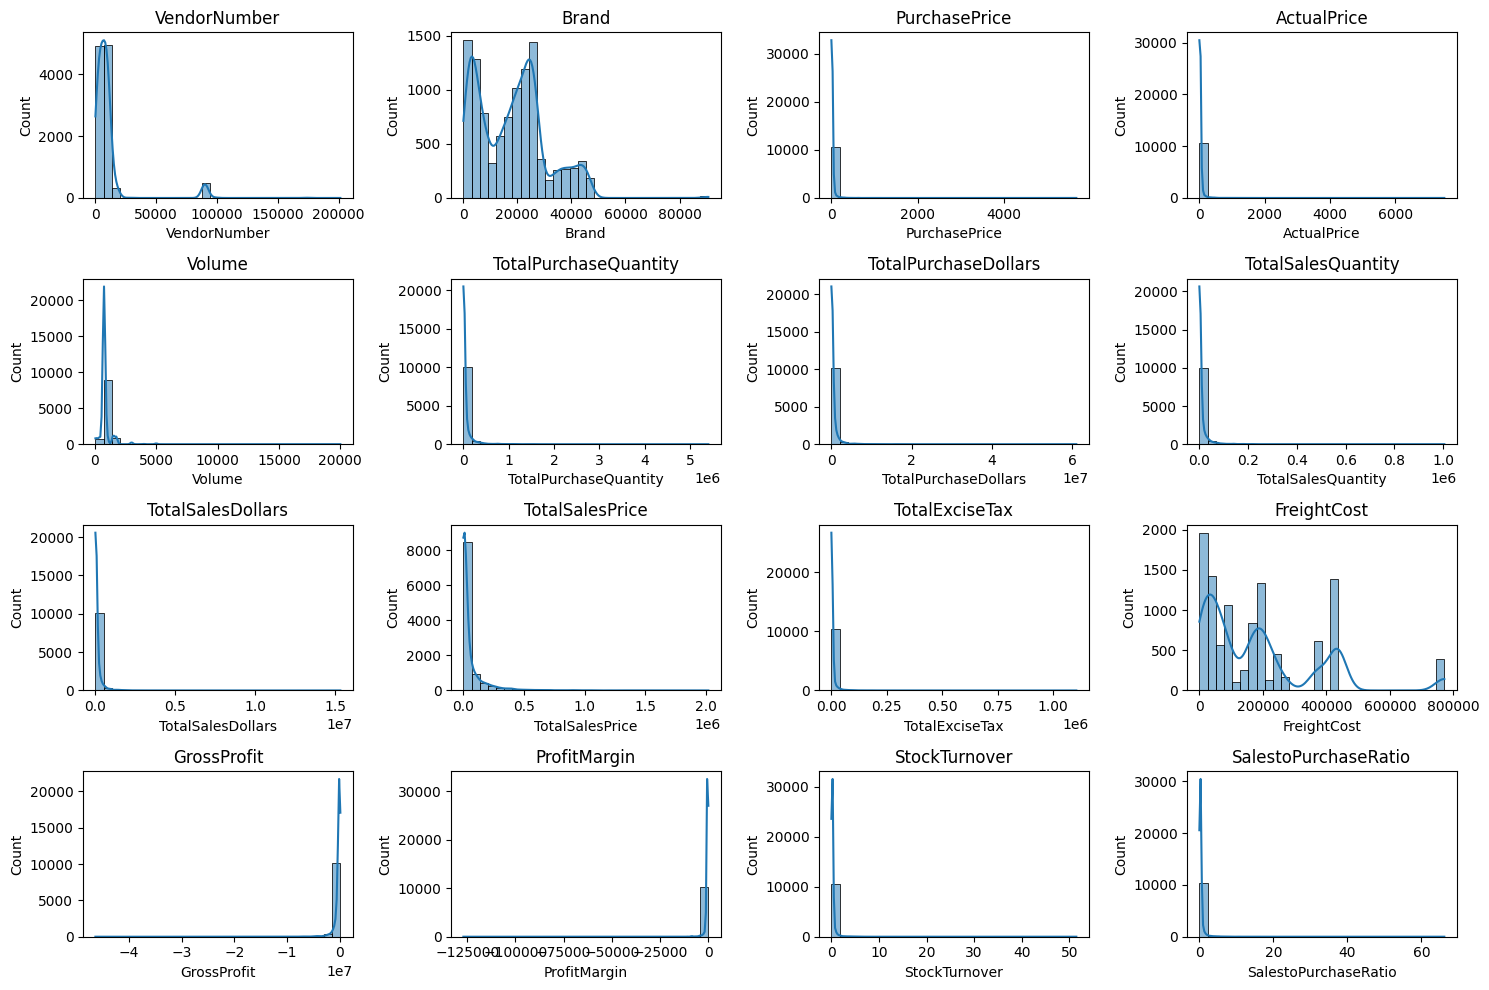

In [4]:
# distribution plots for numericals columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

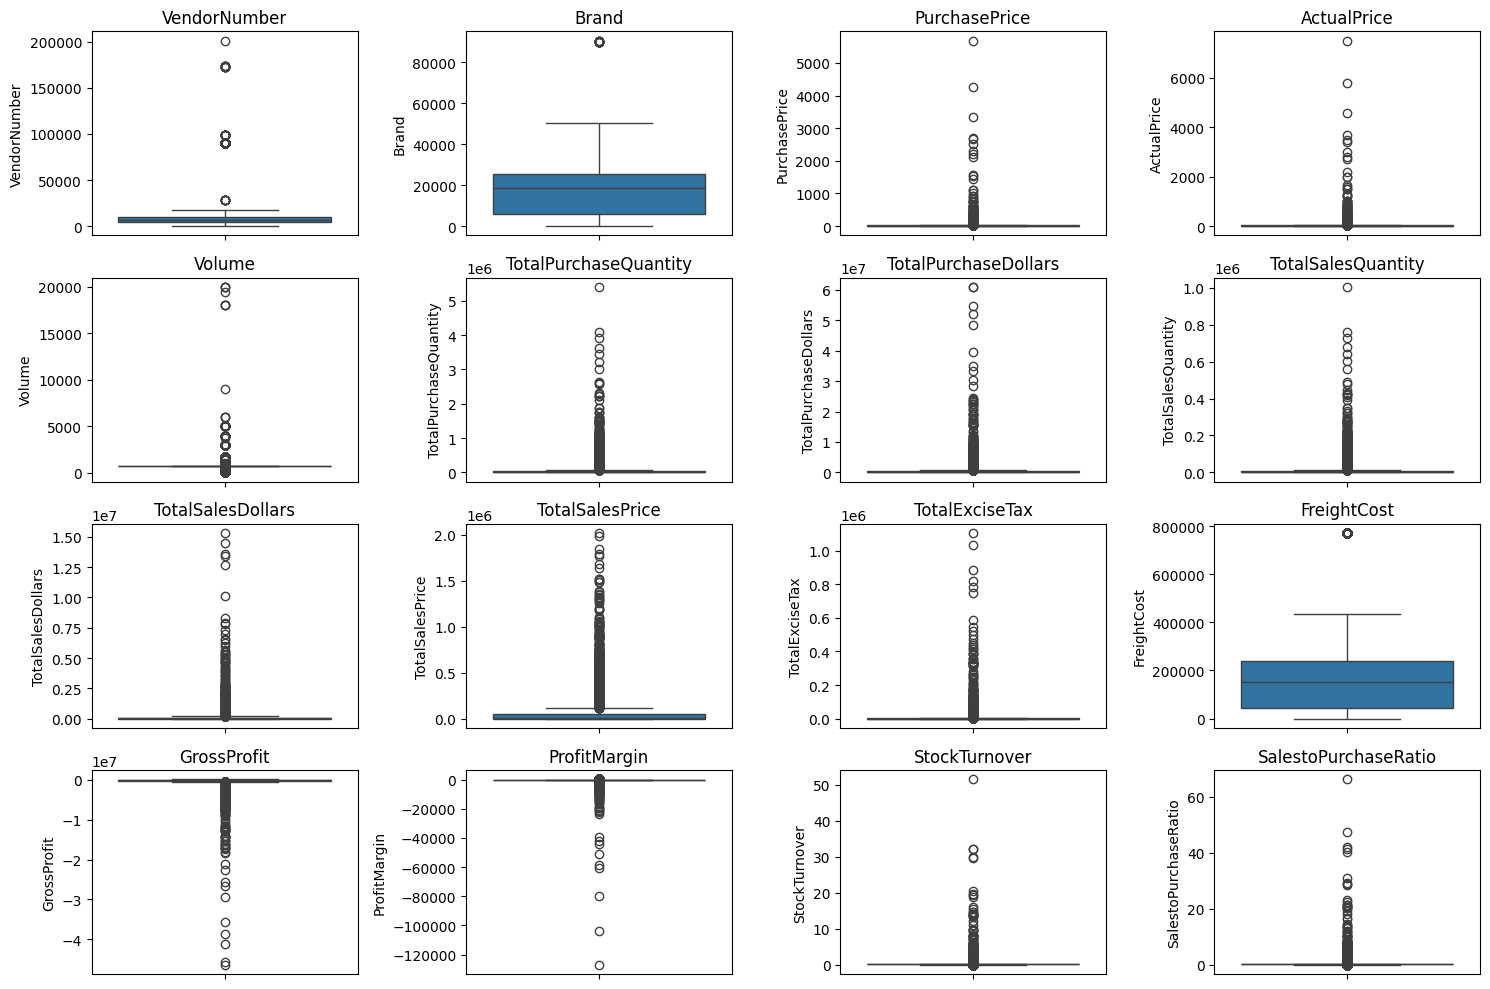

In [5]:
#outliers detection with boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# summary Statistics insights:
Negative & Zero values:
- Gross profit: minimum value is -52,002.78, indicating losses. some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

- Profit margin: has a minimum of -infinity, which suggests cases where revenue is zero or even lower than costs.

- Total sales quantity & sales dollars: minimum calues are 0, meaning some products were purchased but never sold. these could be slow-moving or obsolete stock.

Outliers indicated by high standard deviations:

- Purchases & actual prices: the max values(5,681.81, 7,499.99) are siginificantly higher than the mean (24.39& 35.64) indicating potential premium products.

- freight cost: huge variation, from (0.09 to 257,032.07), suggests logistics inefficiencies or bulk shipments.

- stock turnover: ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.


In [6]:
# let's filter the data by removing inconsistencies
df =pd.read_sql_query(""" select * from vendor_sales_summary
                        where GrossProfit >0
                        and ProfitMargin > 0
                        and TotalSalesQuantity > 0""", conn)

In [7]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,480,BACARDI USA INC,4881,Bacardi Twin Pack 2/750mls,14.81,19.99,750.0,13536,200468.16,10230.0,201761.70,75573.87,8059.89,267858.81,1293.54,0.641123,0.755762,1.006453
1,2555,DISARONNO INTERNATIONAL LLC,1212,DiSaronna Amaretto Sour VAP,14.38,21.99,750.0,9008,129535.04,7833.0,170825.67,87319.95,6170.25,17583.09,41290.63,24.171209,0.869560,1.318760
2,10754,PERFECTA WINES,10264,Fort Ross Pnt Nr Sonoma Cst,19.60,29.99,750.0,4272,83731.20,3732.0,111922.68,50383.20,415.71,86161.56,28191.48,25.188353,0.873596,1.336690
3,653,STATE WINE & SPIRITS,23256,Robert Hall Cab Svgn,9.39,13.99,750.0,7072,66406.08,5517.0,77182.83,29253.09,616.05,24044.94,10776.75,13.962626,0.780119,1.162286
4,1128,BROWN-FORMAN CORP,1722,Jack Daniels Sinatra Century,351.55,449.99,1000.0,176,61872.80,144.0,64798.56,58048.71,151.20,205805.04,2925.76,4.515162,0.818182,1.047287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,32,45.44,42.0,83.58,17.91,2.19,771096.21,38.14,45.632927,1.312500,1.839349
665,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,32,42.24,15.0,47.85,32.88,1.65,81301.23,5.61,11.724138,0.468750,1.132812
666,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,96,37.44,402.0,196.98,4.41,21.12,150880.86,159.54,80.992994,4.187500,5.261218
667,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,16,23.52,216.0,429.84,232.83,45.36,771096.21,406.32,94.528197,13.500000,18.275510


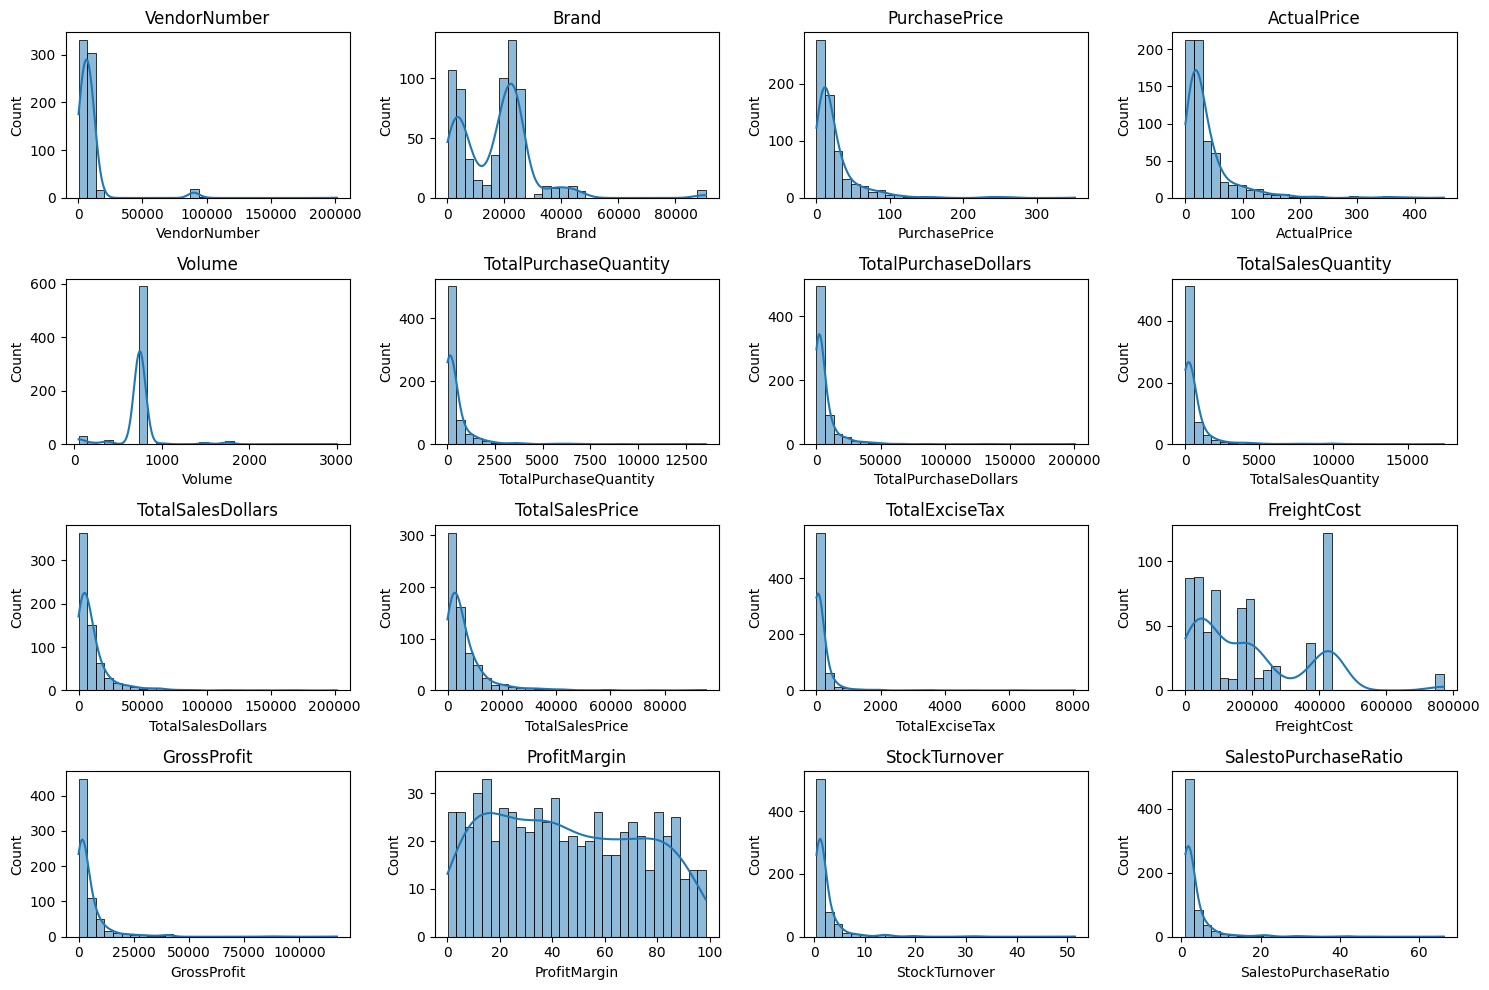

In [8]:
# distribution plots for numericals columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4, 4, i+1) # adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

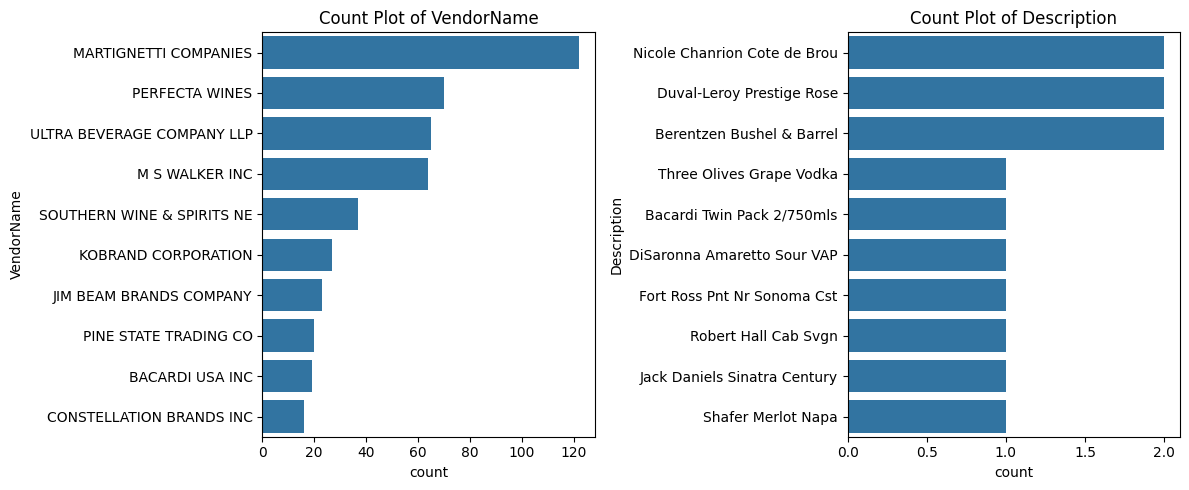

In [9]:
# count plots for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # top 10 categorical
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

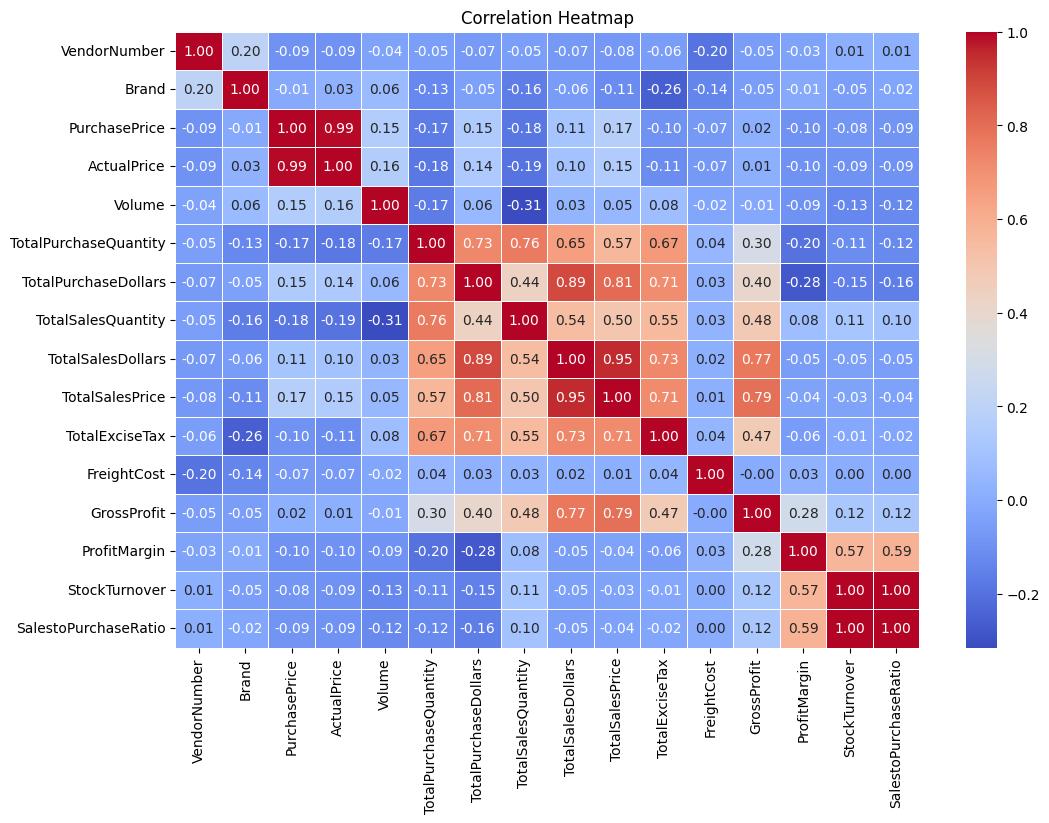

In [10]:
# correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Correaltions Insights
- PurchasePrice has weak correaltions with totalsalesdollars (-0.012) and grossprofit (-0.016) , suggesting that price variations do not significantly impact sales revenue or profit.
- strong correlation between profit margin & total sales quantity (0.999) , confirming efficient inventory turnover.
- negative correlation between profit margin & total sales price (-0.179) suggests that a as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- stock turnover has weak negative correlations with both grossprofit (-0.038) and profitmargin (-0.055) indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis
- Identify brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margins.

In [13]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin': 'mean'}).reset_index()

In [14]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold

np.float64(1667.25)

In [16]:
high_margin_threshold

np.float64(80.53179377674624)

In [17]:
# filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
    ]
print("Brands with low sales but high profit margins: ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins: 


,Description,TotalSalesDollars,ProfitMargin
267,Dr McGillicuddy's Apple Pie,196.98,80.992994
608,Three Olives Grape Vodka,255.42,95.552423
33,Aresti Pnt Nr Curico Vly,284.43,81.549063
600,The Club Strawbry Margarita,429.84,94.528197
481,Piehole Apple Pie,469.26,85.270426
515,Riunite Sweet White,485.19,86.479523
531,Sauza Sparkling Margarita,503.28,82.896201
251,DeKuyper Mixed Berry Medley,758.31,83.204758
642,Vigne A Porrona Rosso,818.37,83.068783
415,Mad Dogs & Englishmen Jumil,839.40,87.553014


In [18]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visualzation

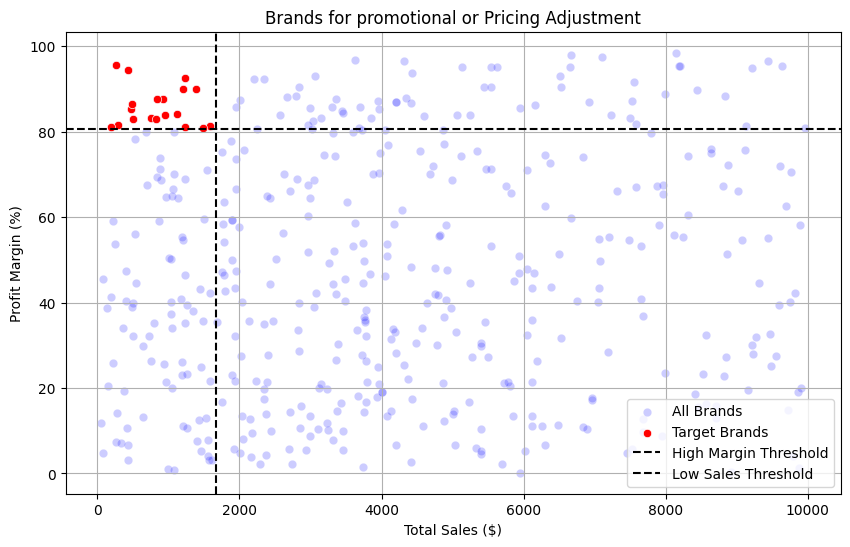

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance

In [20]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value / 1_000: .2f}K"
    else:
        return str(value)

In [53]:
# top vendors & brands by sales performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES          1476319.59
ULTRA BEVERAGE COMPANY LLP      966800.94
M S WALKER INC                  677901.96
BACARDI USA INC                 547922.16
PERFECTA WINES                  537688.74
SOUTHERN WINE & SPIRITS NE      423435.87
BROWN-FORMAN CORP               365208.69
STATE WINE & SPIRITS            217284.45
DISARONNO INTERNATIONAL LLC     185169.15
PERNOD RICARD USA               173913.69
Name: TotalSalesDollars, dtype: float64

In [46]:
top_brands

Description
Bacardi Twin Pack 2/750mls      200468.16
DiSaronna Amaretto Sour VAP     129535.04
Fort Ross Pnt Nr Sonoma Cst      83731.20
Robert Hall Cab Svgn             66406.08
Jack Daniels Sinatra Century     61872.80
Shafer Merlot Napa               54628.80
Dewars Highlander Honey          51636.48
Baracchi O'Lillo                 48600.00
Nicholson Ranch Chard Son Ct     46996.32
Hirsch 20 Yr American Whisky     46931.52
Name: TotalPurchaseDollars, dtype: float64

In [47]:
top_brands.apply(lambda x: format_dollars(x))

Description
Bacardi Twin Pack 2/750mls       200.47K
DiSaronna Amaretto Sour VAP      129.54K
Fort Ross Pnt Nr Sonoma Cst       83.73K
Robert Hall Cab Svgn              66.41K
Jack Daniels Sinatra Century      61.87K
Shafer Merlot Napa                54.63K
Dewars Highlander Honey           51.64K
Baracchi O'Lillo                  48.60K
Nicholson Ranch Chard Son Ct      47.00K
Hirsch 20 Yr American Whisky      46.93K
Name: TotalPurchaseDollars, dtype: object

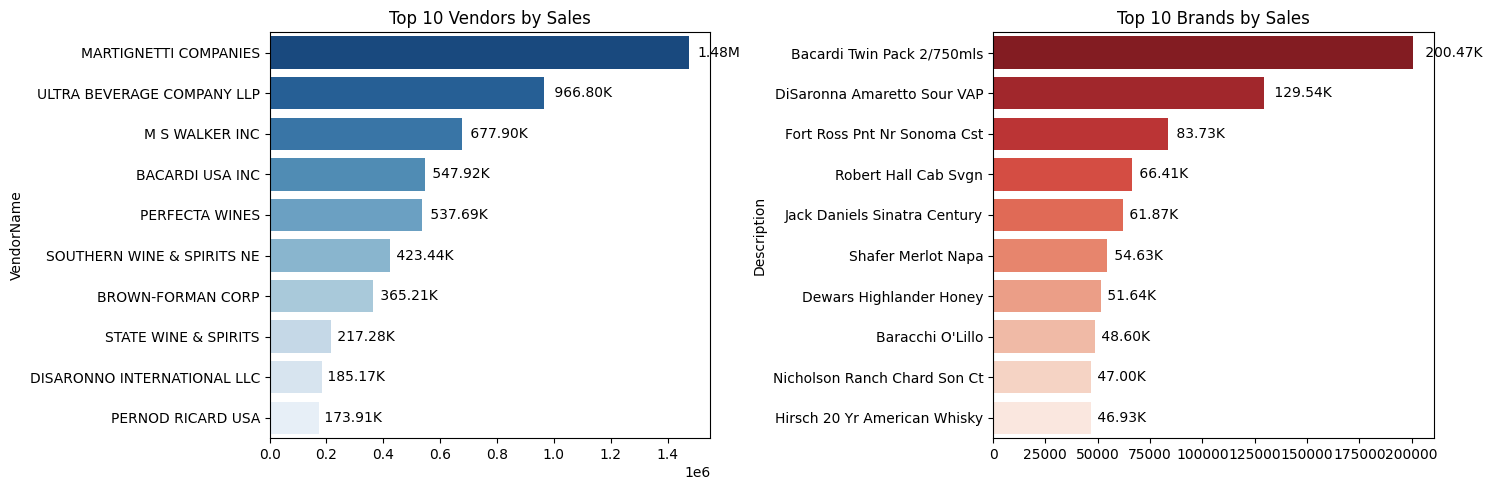

In [48]:
plt.figure(figsize=(15, 5))

# 🔹 Plot for top vendors (Barplot)
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index.astype(str), x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

# Add value labels
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black')

# 🔹 Plot for top brands (Barplot)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

# Add value labels
for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Which vendors contrubute the most to total purchases dollars

In [150]:
df.groupby('VendorName').agg({
    'TotalSalesDollars':'sum',
    'GrossProfit':'sum',
    'TotalPurchaseDollars':'sum',
}).reset_index()

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars
0,ALISA CARR BEVERAGES,126806.04,31234.20,95571.84
1,ATLANTIC IMPORTING COMPANY,11366.31,1109.03,10257.28
2,BACARDI USA INC,547922.16,207461.36,340460.80
3,BANFI PRODUCTS CORP,14442.36,5243.48,9198.88
4,BROWN-FORMAN CORP,365208.69,191207.89,174000.80
...,...,...,...,...
57,VINILANDIA USA,78212.13,47681.41,30530.72
58,VRANKEN AMERICA,8378.19,5495.15,2883.04
59,WESTERN SPIRITS BEVERAGE CO,4977.51,1930.47,3047.04
60,WILLIAM GRANT & SONS INC,53669.58,15360.14,38309.44


In [151]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()
vendor_performance.shape

(62, 4)

In [154]:
print(vendor_performance.columns)

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'Purchase_Contribution%'],
      dtype='object')


In [153]:
vendor_performance['Purchase_Contribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [155]:
round(vendor_performance.sort_values('Purchase_Contribution%', ascending=False), 2)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
29,MARTIGNETTI COMPANIES,881010.40,595309.19,1476319.59,19.93
55,ULTRA BEVERAGE COMPANY LLP,571004.80,395796.14,966800.94,12.91
2,BACARDI USA INC,340460.80,207461.36,547922.16,7.70
36,PERFECTA WINES,310116.32,227572.42,537688.74,7.01
27,M S WALKER INC,308977.92,368924.04,677901.96,6.99
...,...,...,...,...,...
13,DUGGANS DISTILLED PRODUCTS,556.32,85.29,641.61,0.01
34,OLE SMOKY DISTILLERY LLC,402.88,28.85,431.73,0.01
17,FLAVOR ESSENCE INC,272.00,4151.23,4423.23,0.01
9,Circa Wines,257.60,581.80,839.40,0.01


In [156]:
# display top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors ['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors ['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors ['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
0,ALISA CARR BEVERAGES,95.57K,31.23K,126.81K,2.161536
1,ATLANTIC IMPORTING COMPANY,10.26K,1.11K,11.37K,0.231988
2,BACARDI USA INC,340.46K,207.46K,547.92K,7.700160
3,BANFI PRODUCTS CORP,9.20K,5.24K,14.44K,0.208050
4,BROWN-FORMAN CORP,174.00K,191.21K,365.21K,3.935355
5,CAMPARI AMERICA,40.62K,13.05K,53.68K,0.918723
6,CASTLE BRANDS CORP.,13.38K,7.01K,20.39K,0.302527
7,CONSTELLATION BRANDS INC,99.65K,55.92K,155.57K,2.253730
8,CRUSH WINES,10.99K,6.88K,17.87K,0.248587
9,Circa Wines,257.6,581.8,839.4,0.005826


In [157]:
top_vendors['Purchase_Contribution%'].sum()

np.float64(17.966480848825473)

In [160]:
print(top_vendors.columns)

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'Purchase_Contribution%',
       'Cumulative_Contribution%'],
      dtype='object')


In [159]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cumulative_Contribution%
0,ALISA CARR BEVERAGES,95.57K,31.23K,126.81K,2.161536,2.161536
1,ATLANTIC IMPORTING COMPANY,10.26K,1.11K,11.37K,0.231988,2.393524
2,BACARDI USA INC,340.46K,207.46K,547.92K,7.700160,10.093684
3,BANFI PRODUCTS CORP,9.20K,5.24K,14.44K,0.208050,10.301734
4,BROWN-FORMAN CORP,174.00K,191.21K,365.21K,3.935355,14.237088
5,CAMPARI AMERICA,40.62K,13.05K,53.68K,0.918723,15.155811
6,CASTLE BRANDS CORP.,13.38K,7.01K,20.39K,0.302527,15.458338
7,CONSTELLATION BRANDS INC,99.65K,55.92K,155.57K,2.253730,17.712068
8,CRUSH WINES,10.99K,6.88K,17.87K,0.248587,17.960655
9,Circa Wines,257.6,581.8,839.4,0.005826,17.966481


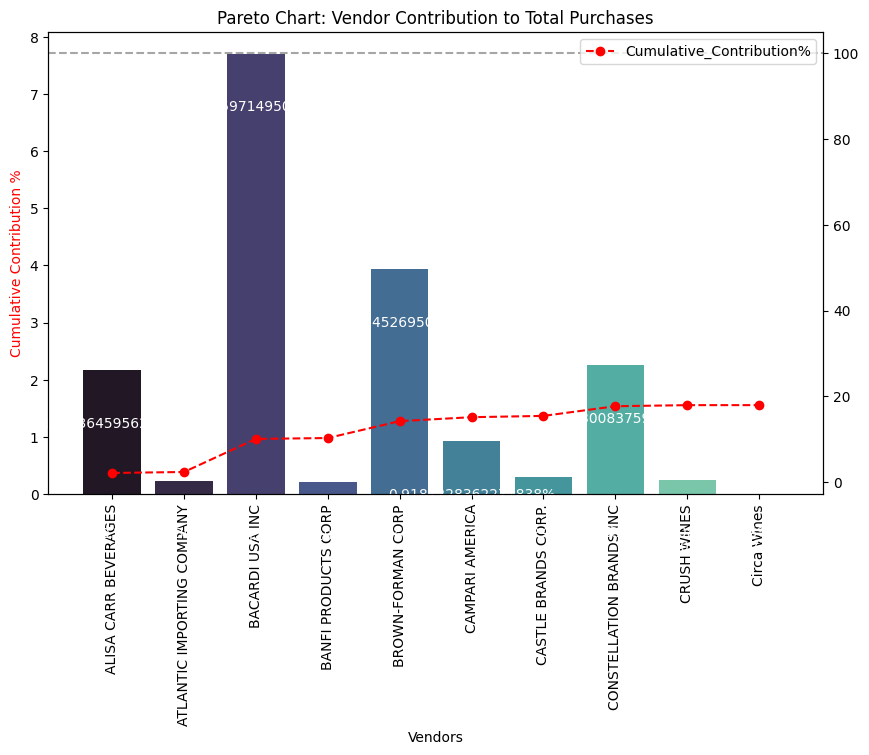

In [161]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for purchase contrubution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

#line plot for cumulative contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative_Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax1.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

# How much to total procurement is dependent on the top vendors?

In [162]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(), 2)} %")

Total Purchase Contribution of top 10 vendors is 17.97 %


In [163]:
print(type(top_vendors))

<class 'pandas.core.frame.DataFrame'>


In [164]:
print(top_vendors.columns)

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'Purchase_Contribution%',
       'Cumulative_Contribution%'],
      dtype='object')


Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'Purchase_Contribution%',
       'Cumulative_Contribution%'],
      dtype='object')


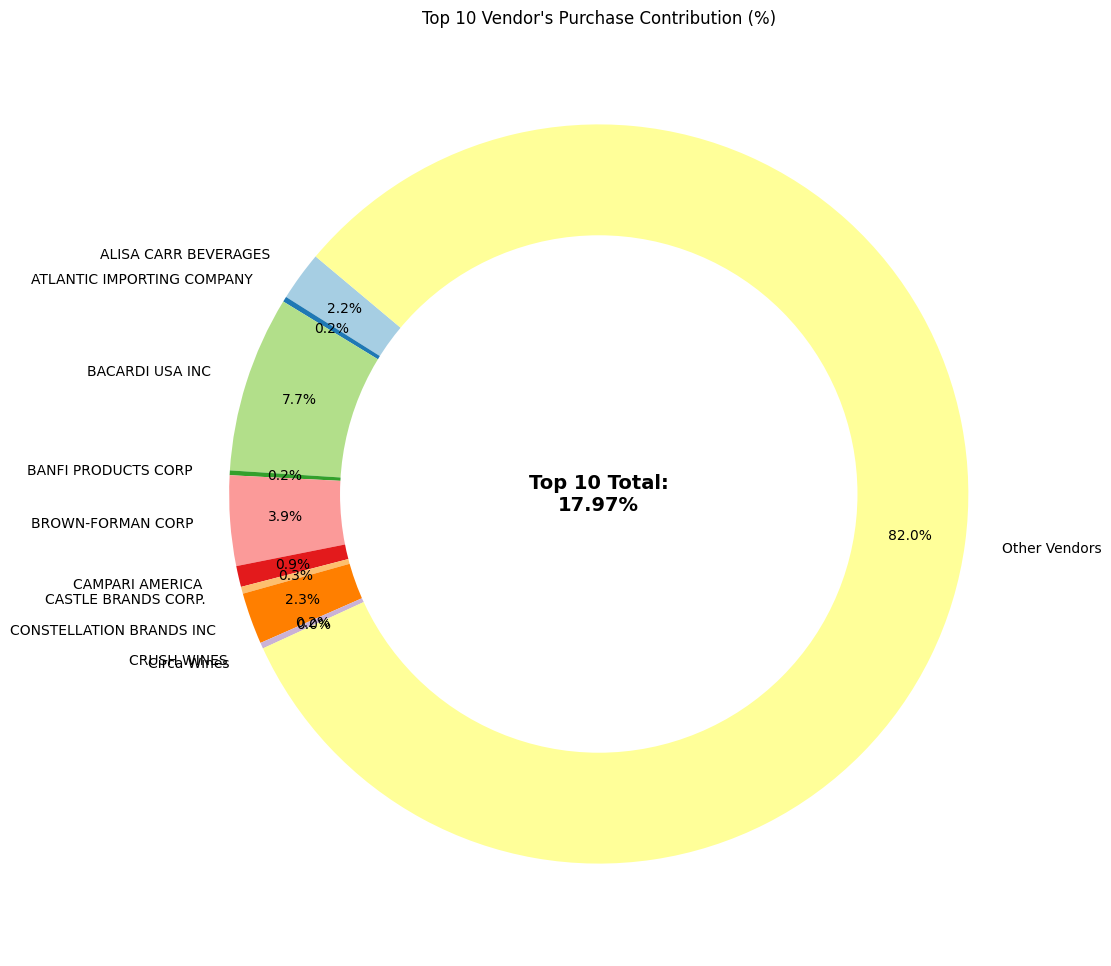

In [177]:
import matplotlib.pyplot as plt

# Yahan pehle check karo actual columns
print(top_vendors.columns)

# Correct column name use karo (agar naam 'PurchaseContribution%' hai to neeche usi ko rakho)
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)  # <-- yahan naam check karke fix karo

# Contribution calculate
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect.
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the centre
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [112]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [114]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q =3, labels=["Small", "Medium", "Large"])

In [117]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,13536
1,Large,9008
2,Large,4272
3,Large,7072
4,Medium,176
...,...,...
664,Small,32
665,Small,32
666,Medium,96
667,Small,16


In [118]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,37.902423
Medium,28.452227
Large,13.319189


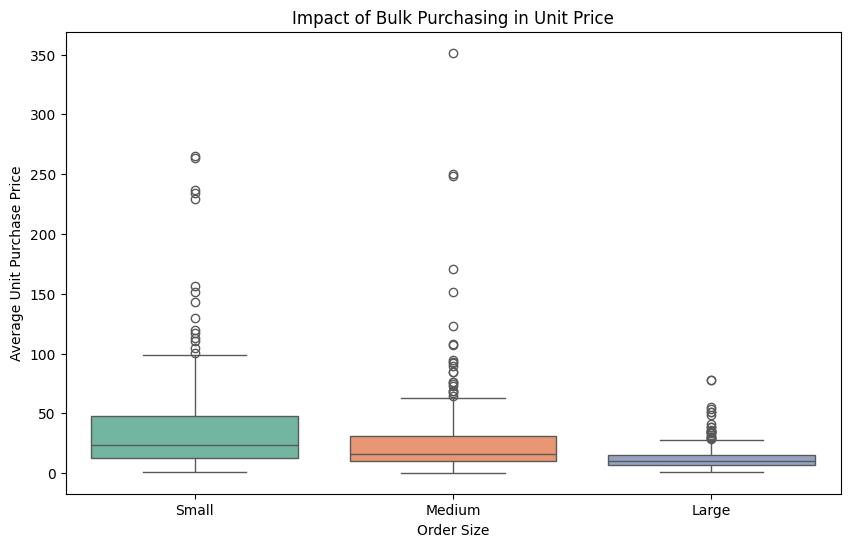

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing in Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

- Vendors buying in bulk (large ordersize) get the lowest unit price($10.78per unit), meaning higher if they can manage inventory efficiently.
- The price difference between small and large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing startegies successfully encourage vendors to purchase in large volumes, leading to higher overall sales despite lower per-unit revenue.

### Which vendors have low inventory turnover , indicating excess stock and slow-moving producgs?

In [123]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
WINE GROUP INC,0.468750
PROXIMO SPIRITS INC.,0.679861
THE PIERPONT GROUP LLC,0.721154
BROWN-FORMAN CORP,0.735109
KLIN SPIRITS LLC,0.735577
BACARDI USA INC,0.739187
R.P.IMPORTS INC,0.743750
ATLANTIC IMPORTING COMPANY,0.743952
FORTUNE WINE BROKERS LLC,0.750000


### 

In [124]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Captical:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Captical: -936540.19


In [126]:
# Aggregate capital locked per vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#Sort vendors with the highest locked capital 
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
0,ALISA CARR BEVERAGES,11.77K
12,DISARONNO INTERNATIONAL LLC,6.28K
52,THE PIERPONT GROUP LLC,5.84K
33,NICHE W & S,3.72K
32,MOET HENNESSY USA INC,3.59K
41,R.P.IMPORTS INC,3.20K
1,ATLANTIC IMPORTING COMPANY,2.63K
11,DIAGEO NORTH AMERICA INC,2.24K
43,Russian Standard Vodka,1.30K
39,POVERTY LANE ORCHARDS,952.24


In [127]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [130]:
top_vendors = df[df["TotalSalesDollars"] >=top_threshold] ["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [131]:
top_vendors

0       0.641123
1      24.171209
2      25.188353
3      13.962626
4       4.515162
         ...    
401    88.495058
485    95.645673
513    93.972120
597    97.515874
600    97.617315
Name: ProfitMargin, Length: 168, dtype: float64

In [133]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # standard error
    t_critical = stats.t.ppf((1+ confidence) / 2, df=len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val-margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (37.75, 45.92), Mean: 41.83
Low Vendors 95% CI: (40.62, 49.18), Mean: 44.90


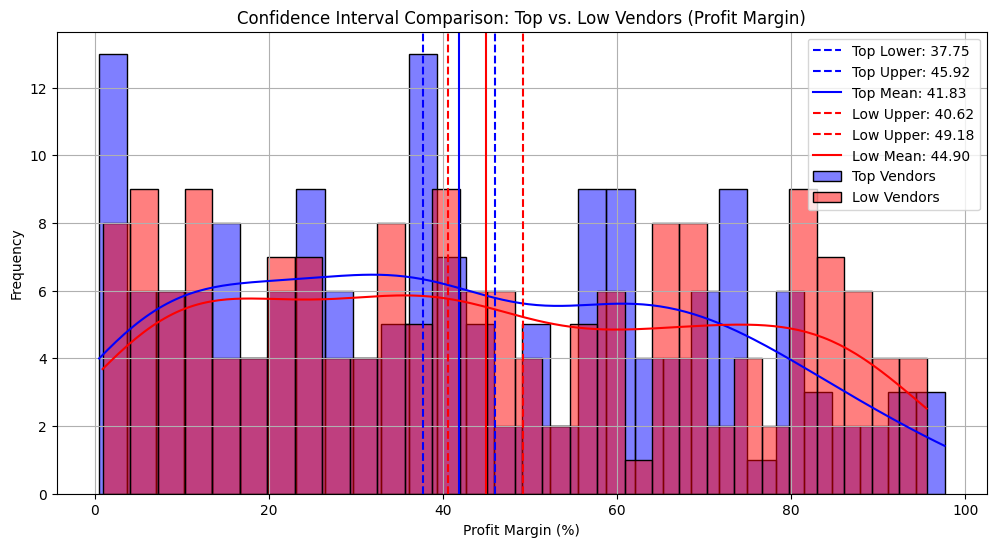

In [137]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Upper: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

#Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [145]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform two-sample t-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print Results
print(f"T-Statistics: {t_stat:.4f}, P-Value, {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0 : There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fall to Reject H0: No significant difference in profit margins.")

T-Statistics: -1.0218, P-Value, 0.3076
Fall to Reject H0: No significant difference in profit margins.
